<a href="https://colab.research.google.com/github/Sathwik-parimi-07/woc/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv(r'/content/drive/MyDrive/woc drive/multi_classification_train.csv')

In [ ]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48000 entries, 0 to 47999
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          48000 non-null  int64  
 1   Feature_1   48000 non-null  float64
 2   Feature_2   48000 non-null  float64
 3   Feature_3   48000 non-null  float64
 4   Feature_4   48000 non-null  float64
 5   Feature_5   48000 non-null  float64
 6   Feature_6   48000 non-null  float64
 7   Feature_7   48000 non-null  float64
 8   Feature_8   48000 non-null  float64
 9   Feature_9   48000 non-null  float64
 10  Feature_10  48000 non-null  float64
 11  Feature_11  48000 non-null  float64
 12  Feature_12  48000 non-null  float64
 13  Feature_13  48000 non-null  float64
 14  Feature_14  48000 non-null  float64
 15  Feature_15  48000 non-null  float64
 16  Feature_16  48000 non-null  float64
 17  Feature_17  48000 non-null  float64
 18  Feature_18  48000 non-null  float64
 19  Feature_19  48000 non-nul

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Class
0,1,-90.532634,-66.953472,79.261856,-111.800554,126.403549,111.509348,207.728953,-26.600556,-106.229324,...,148.391734,77.835738,-10.728207,1.100625,1.035362,-87.010809,-16.242297,-32.074925,-17.666026,1
1,2,-103.156720,-16.070400,87.819228,12.614599,51.347780,67.483725,40.269172,51.442254,-151.486693,...,29.009475,3.995786,-10.861630,-142.605726,-25.924592,-86.755351,-36.479749,-130.246619,-44.143652,2
2,3,24.326153,-92.098078,82.238354,-56.795879,85.203996,127.916504,-90.080307,-128.124071,18.036020,...,111.810098,65.826018,-101.271203,-44.127749,-7.131464,-105.049759,-130.948256,-43.113523,-37.330448,4
3,4,-64.631737,-83.703583,84.135072,-5.516152,74.338494,112.630556,181.576798,-1.054023,60.469865,...,50.047108,100.439101,-117.842955,150.239788,-144.635542,-144.306209,-69.272905,-79.629675,-51.334456,2
4,5,-55.473830,-78.853237,88.129107,75.200543,76.991520,60.224711,-13.106559,-146.773016,-33.490566,...,85.988282,23.381960,11.876102,-188.296503,-80.323929,-56.757987,-20.314172,-42.625170,-24.102753,2


In [ ]:
data2=data.drop(columns=['ID'],axis=1)

In [ ]:
x=data2.iloc[:,:-1].values
y=data2.iloc[:,-1].values

In [ ]:
#normalisation features
mean=np.mean(x,axis=0)
sd=np.std(x,axis=0)
x=(x-mean)/(sd+1e-6)
#no need since binary classification
'''mean_y=np.mean(y)
sd_y=np.std(y)
y=(y-mean_y)/(sd_y+1e-6)'''

'mean_y=np.mean(y)\nsd_y=np.std(y)\ny=(y-mean_y)/(sd_y+1e-6)'

In [ ]:

X_train = x
y_train = y


In [ ]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [ ]:
# Implement KNN Algorithm
def knn(X_train, y_train, X_test, k=3):
    """
    Perform K-Nearest Neighbors classification on the test data.
    """
    y_pred = []

    # Loop over each test point
    for test_point in X_test:
        # Compute distances between the test point and all the train points
        distances = np.array([euclidean_distance(test_point, train_point) for train_point in X_train])

        # Sort the distances and get indices of the K smallest distances
        sorted_indices = np.argsort(distances)

        # Get the K nearest neighbors' labels
        neighbors = y_train[sorted_indices[:k]]

        # Predict the class label (majority vote)
        unique, counts = np.unique(neighbors, return_counts=True)
        predicted_class = unique[np.argmax(counts)]
        y_pred.append(predicted_class)

    return np.array(y_pred)


In [ ]:
X_test = x[:10,:]
y_test  = y[:10]      # 10 test samples   just to see
#Make Predictions
k = 3
y_pred = knn(X_train, y_train, X_test, k)

Predicted labels: [1 2 4 2 2 1 2 3 1 4]
Accuracy: 100.00%


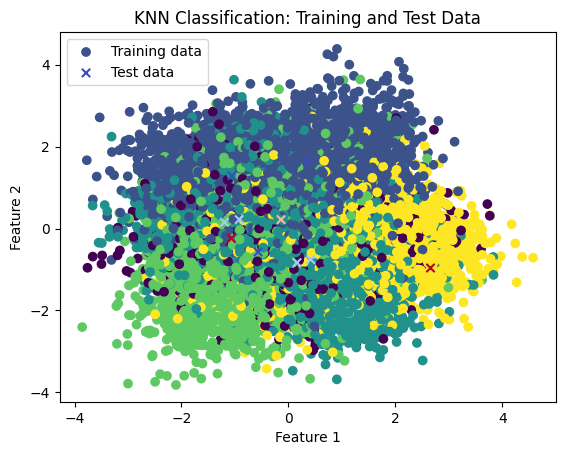

In [ ]:

accuracy = np.mean(y_pred == y_test[:10])  # checking
print(f"Predicted labels: {y_pred}")
print(f"Accuracy: {accuracy * 100:.2f}%")


plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', marker='o', label='Training data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', marker='x', label='Test data')
plt.title('KNN Classification: Training and Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()